In [1]:
import pandas as pd
import re
import spacy
import requests
from nltk.util import bigrams

import time
from datetime import datetime 

In [2]:
df2 = pd.read_csv('sentences_final4.csv')
df2

,sentence,no_change,summarizing
0,והנפיחות בעיניים?,1,0
1,"ככלל, כדאי להיות קשובים לגוף וכשאשר מופיעים סי...",0,1
2,הצגה עצמיתתחילה תתבקש לפרט את המחלות או הליקוי...,0,1
3,מגמת משרד החינוך הינה לשלב את הילד בעל הצרכים ...,0,1
4,"בייעוץ כזה יובאו בחשבון המסלול, משך הטיול, אופ...",0,1
...,...,...,...
516,"הורים יקרים,במדריך הזה מפורט התהליך העומד בפני...",0,1
517,מהיום ניתן לקבל את חשבון הארנונה ישירות לדואר...,0,1
518,".תורם לאיכות הסביבה, קבלת חשבון ארנונה תקופתי ...",0,1
519,ניתן לקבל את חשבון הארנונה למייל במילוי טופס.,0,1


In [3]:
start_time = datetime.now() 

words = []
letters = []
word_avg = []
numbers = []
symbols = []
if_question = []

punctuation = []
sym_hashtag = []
sym_shtrudel = []
sym_dollar = []
sym_ampersand = []
sym_percend = []
sym_star = []
sym_tilda = []
sym_math = []
sym_logic = []
sym_brackets = []
sym_num = []
sym_quotes = []
sym_slashes = []

root_l = []
NOUN_l = []
VERB_l = []
ADV_l = []
AUX_l = []
ADJ_l = []
ADP_l = []
PUNCT_l = []

bigrams = []

for s in df2.sentence:
    
    bigrams.append(len(s.split())-1)
    
    r = requests.get('http://lindat.mff.cuni.cz/services/udpipe/api/process?tokenizer&tagger&parser&data=' + str(s))
    r_dict = r.json()
    word_id = r_dict['result']
    spl = word_id.split()

    root = 0
    NOUN = 0
    VERB = 0
    ADV = 0
    AUX = 0
    ADJ = 0
    ADP = 0
    PUNCT = 0

    for w in range(len(spl)):
        if spl[w] == "root":
            root=root+1;
        if spl[w] == "NOUN":
            NOUN=NOUN+1;
        if spl[w] == "VERB":
            VERB=VERB+1;
        if spl[w] == "ADV":
            ADV=ADV+1;
        if spl[w] == "AUX":
            AUX=AUX+1;
        if spl[w] == "ADJ":
            ADJ=ADJ+1;
        if spl[w] == "ADP":
            ADP=ADP+1;
        if spl[w] == "PUNCT":
            PUNCT=PUNCT+1;
            
    root_l.append(root)
    NOUN_l.append(NOUN)
    VERB_l.append(VERB)
    ADV_l.append(ADV)
    AUX_l.append(AUX)
    ADJ_l.append(ADJ)
    ADP_l.append(ADP)
    PUNCT_l.append(PUNCT)
    
    val = re.findall(r'\w+', s)
    words.append(len(val))
    
    val = re.findall(r'\w', s)
    letters.append(len(val))
    
    val = re.findall(r'\w+', s)
    average = sum(len(word) for word in val) / len(val)
    word_avg.append(round(average, 3))
    
    val = re.findall(r'[0-9]', s)
    numbers.append(len(val))
    
    val = re.findall(r'[^א-ת0-9 ]', s)
    symbols.append(len(val))
    
    val = re.findall(r'[`!^:;\',.?]', s)
    punctuation.append(len(val))
    
    val = re.findall(r'[#]', s)
    sym_hashtag.append(len(val))
    
    val = re.findall(r'[@]', s)
    sym_shtrudel.append(len(val))
    
    val = re.findall(r'[$]', s)
    sym_dollar.append(len(val))
    
    val = re.findall(r'[&]', s)
    sym_ampersand.append(len(val))
    
    val = re.findall(r'[%]', s)
    sym_percend.append(len(val))
    
    val = re.findall(r'[*]', s)
    sym_star.append(len(val))
    
    val = re.findall(r'[~]', s)
    sym_tilda.append(len(val))
    
    val = re.findall(r'[\+\-\*\/<>=%^]', s)
    sym_math.append(len(val))
    
    val = re.findall(r'[&|]', s)
    sym_logic.append(len(val))
    
    val = re.findall(r'[()[]{}]', s)
    sym_brackets.append(len(val))
    
    val = re.findall(r'[№]', s)
    sym_num.append(len(val))
    
    val = re.findall(r'["\']', s)
    sym_quotes.append(len(val))
    
    val = re.findall(r'[\//]', s)
    sym_slashes.append(len(val))
    
    if s[len(s)-1]=='?':
        if_question.append(1)
    else:
        if_question.append(0)

print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))

Time elapsed in (hh:mm:ss.ms): "0:02:26.327964"


In [4]:
df3 = pd.DataFrame({'sentence' : df2.sentence,
                    'no_change' : df2.no_change,
                    'summarizing' : df2.summarizing,
                    'bigrams' : bigrams,
                    'root' : root_l,
                    'NOUN': NOUN_l,
                    'VERB': VERB_l,
                    'ADV': ADV_l,
                    'AUX': AUX_l,
                    'ADJ': ADJ_l,
                    'ADP': ADP_l,
                    'PUNCT': PUNCT_l,
                    'words': words, 
                    'letters': letters, 
                    'word_avg': word_avg,
                    'numbers': numbers, 
                    'symbols': symbols,
                    'if_question': if_question,
                    'punctuation': punctuation,
                    'sym_hashtag': sym_hashtag,
                    'sym_shtrudel': sym_shtrudel,
                    'sym_dollar': sym_dollar,
                    'sym_ampersand': sym_ampersand,
                    'sym_percend': sym_percend,
                    'sym_star': sym_star,
                    'sym_tilda': sym_tilda,
                    'sym_math': sym_math,
                    'sym_logic': sym_logic,
                    'sym_brackets': sym_brackets,
                    'sym_num': sym_num,
                    'sym_quotes': sym_quotes,
                    'sym_slashes': sym_slashes})

df3.head()

,sentence,no_change,summarizing,bigrams,root,NOUN,VERB,ADV,AUX,ADJ,...,sym_ampersand,sym_percend,sym_star,sym_tilda,sym_math,sym_logic,sym_brackets,sym_num,sym_quotes,sym_slashes
0,והנפיחות בעיניים?,1,0,1,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"ככלל, כדאי להיות קשובים לגוף וכשאשר מופיעים סי...",0,1,25,1,12,3,7,0,1,...,0,0,0,0,1,0,0,0,0,0
2,הצגה עצמיתתחילה תתבקש לפרט את המחלות או הליקוי...,0,1,19,1,9,4,2,0,0,...,0,0,0,0,1,0,0,0,0,0
3,מגמת משרד החינוך הינה לשלב את הילד בעל הצרכים ...,0,1,25,1,16,3,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"בייעוץ כזה יובאו בחשבון המסלול, משך הטיול, אופ...",0,1,24,1,18,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0


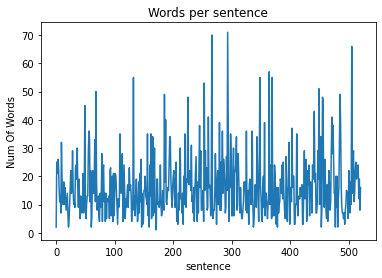

In [5]:
import matplotlib.pyplot as plt
l = df3.index
plt.plot(l, words)                                             
plt.xlabel('sentence')
plt.ylabel('Num Of Words')
plt.xticks()
plt.title('Words per sentence')
plt.yticks()
plt.style.use('default')
plt.show()

In [6]:
# 1. how many trees (number of nodes, number of leaves, tree depth and number of simple sentences) in each sentence
# 2. dependency parcer (dependency parse tree?) / mean dependency distance?
# 3. how many roots

# 4. MDD (Mean Dependency Distance)[27], also known as average dependency
#    distances (ADD), is a feature that appears to be on top of the affecting features.
#    It measures the sum of the depth of all nodes in the dependency tree divided by
#    the total number of dependencies. For example the MDD score of the sentence
#    “Sarah read the book quickly and understood it correctly” (see Figure 1) is
#    19=8 = 2:735 (for details see [38]).

# 5. Sentence perplexity - Reflecting the degree to which the observed word sequence
#    in the sentence is “expected” compared to what has been observed in the corpus.
#    We used bi-grams Maximum Likelihood Estimator (MLE ^3) model’s scores.
#    ^3Using NLTK machine learning library https://www.nltk.org/api/nltk.lm.html

# 6. NLU
#    Language Model estimation - We use BERT ^4, a large scaled pretrained bidirectional
#    language model, to give a score for each sentence using a Natural
#    Language Understanding (NLU) reasoning technique, based on the average Perplexity
#    of the resulting sentence. We follow [37] and assisted with the BERT
#    baseline implementation of [45].
#    ^4bert-base-uncased pre-trained model https://github.com/huggingface/transformers

# 7. use ONLP site

In [7]:
print(df3['sentence'][320])

״מקום עבודה״ - כל מקום בבניין שעובדים בו אנשים ושאינו משמש למגורים.


In [8]:
r = requests.get('http://lindat.mff.cuni.cz/services/udpipe/api/process?tokenizer&tagger&parser&data=' + str(df3['sentence'][320]))
r_dict = r.json()
word_id = r_dict['result']
spl = word_id.split()

num = 0
for w in range(len(spl)):
        if spl[w] == "root":
            print(spl[w])
            num=num+1;
print(word_id)

root
root
# generator = UDPipe 2, https://lindat.mff.cuni.cz/services/udpipe
# udpipe_model = czech-pdt-ud-2.6-200830
# udpipe_model_licence = CC BY-NC-SA
# newdoc
# newpar
# sent_id = 1
# text = ״מקום עבודה״
1	״	״	PUNCT	Z:-------------	_	2	punct	_	SpaceAfter=No
2	מקום	מקום	NOUN	NNIS1-----A----	Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing|Polarity=Pos	0	root	_	_
3	עבודה	עבודה	NOUN	NNIS1-----A----	Animacy=Inan|Foreign=Yes|Gender=Masc|Polarity=Pos	2	nmod	_	SpaceAfter=No
4	״	״	PUNCT	Z:-------------	_	2	punct	_	_

# sent_id = 2
# text = - כל מקום בבניין שעובדים בו אנשים ושאינו משמש למגורים.
1	-	-	PUNCT	Z:-------------	_	3	punct	_	_
2	כל	כל	DET	AAIS1----1A----	_	3	det	_	_
3	מקום	מקום	NOUN	NNIS1-----A----	Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing|Polarity=Pos	0	root	_	_
4	בבניין	בבניין	NOUN	NNIS1-----A----	Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing|Polarity=Pos	3	nmod	_	_
5	שעובדים	שעובדים	VERB	VB-S---3P-AA---	_	4	nmod	_	_
6	בו	בו	PRON	Db-------------	PronType=Int,Rel	5	obj	_	_
7	אנש

In [9]:
# import requests
# text = 'גנן גידל דגן בגן'
# localhost_yap = "http://localhost:8000/yap/heb/joint"
# data = '{{"text": "{}  "}}'.format(text).encode('utf-8')  # input string ends with two space characters
# headers = {'content-type': 'application/json'}
# response = requests.get(url=localhost_yap, data=data, headers=headers)
# json_response = response.json()

In [10]:
import requests
text = 'גנן גידל דגן בגן'
localhost_yap = "http://localhost:8000/yap/heb/joint"
data = '{{"text": "{}  "}}'.format(text).encode('utf-8')  # input string ends with two space characters
headers = {'content-type': 'application/json'}
response = requests.get(url=localhost_yap, data=data, headers=headers)
json_response = response.json()

ConnectionError: HTTPConnectionPool(host='localhost', port=8000): Max retries exceeded with url: /yap/heb/joint (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000265AF40CBE0>: Failed to establish a new connection: [WinError 10061] Подключение не установлено, т.к. конечный компьютер отверг запрос на подключение'))

In [11]:
import requests
text = 'גנן גידל דגן בגן'
localhost_yap = "http://localhost:8000/yap/heb/joint"
data = '{{"text": "{}  "}}'.format(text).encode('utf-8')  # input string ends with two space characters
headers = {'content-type': 'application/json'}
response = requests.get(url=localhost_yap, data=data, headers=headers)
json_response = response.json()

ConnectionError: HTTPConnectionPool(host='localhost', port=8000): Max retries exceeded with url: /yap/heb/joint (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000265AF40C2E0>: Failed to establish a new connection: [WinError 10061] Подключение не установлено, т.к. конечный компьютер отверг запрос на подключение'))